In [2]:
import numpy as np
import matplotlib
import random

matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs



In [3]:
def dist(pntA, pntB):
    return np.sqrt((pntA[0] - pntB[0]) ** 2 + (pntA[1] - pntB[1]) ** 2)


def random_points(n):
    points = []
    points = make_blobs(n)
    return points[0]


def draw(points, centroids, clusters, clrs):
    for key in clusters.keys():  # ??????
        if len(clusters[key]) > 0:
            plt.scatter(np.array(list(clusters[key]))[:, 0], np.array(list(clusters[key]))[:, 1], color=clrs[key])
    plt.scatter(centroids[:, 0], centroids[:, 1], color='r')
    plt.show()


def calculate_mean(points):
    x_mean = 0
    y_mean = 0
    quantity = 0
    for i in range(len(points)):
        x_mean += points[i][0]
        y_mean += points[i][1]
        quantity += 1
    x_mean /= quantity
    y_mean /= quantity
    return [x_mean, y_mean]


def init_centers(points, k):
    pnt_mean = calculate_mean(points)
    R = -1
    for i in range(len(points)):
        distance = dist(points[i], pnt_mean)
        if R < distance:
            R = distance
    centroids = []
    for i in range(k):
        x_c = R * np.cos(2 * np.pi * i / k) + pnt_mean[0]
        y_c = R * np.sin(2 * np.pi * i / k) + pnt_mean[1]
        centroids.append([x_c, y_c])
    return np.array(centroids)


def calculate_nearest_centroid(points, centroids):
    clusters = {}
    for i in range(len(centroids)):
        clusters[i] = []
    for i in range(len(points)):
        points_range = []
        for j in range(len(centroids)):
            points_range.append(dist(points[i], centroids[j]))
        index = points_range.index(min(points_range))
        clusters[index].append(list(points[i]))
    return clusters


def recalculate_centroids(clusters, centroids):
    new_centroids = []
    for key in clusters.keys():
        cluster_points = list(clusters[key])
        if len(cluster_points) != 0:
            new_centroid = calculate_mean(cluster_points)
        else:
            new_centroid = centroids[key]
        new_centroids.append(new_centroid)
    return np.array(new_centroids)


def k_means(k, points):
    old_centroids = np.array([])
    centroids = init_centers(points, k)
    clusters = calculate_nearest_centroid(points, centroids)
    print("Init centroids and clusters")
    count_of_centroids_update = 0
    while not np.array_equal(centroids, old_centroids):
        count_of_centroids_update += 1
        old_centroids = centroids
        centroids = recalculate_centroids(clusters, centroids)
        clusters = calculate_nearest_centroid(points, centroids)
        print(f"Updating centroids. Iteration - {count_of_centroids_update}")
    return clusters, centroids


def random_color():
    return [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)]


def j(k, points):
    sum = 0.0
    clusters, centroids = k_means(k, points)
    for i in range(len(centroids)):
        cluster_points = clusters[i]
        for point in cluster_points:
            sum += dist(point, centroids[i]) ** 2
    return sum


def d(k, points):
    if k < 2:
        return
    return abs(j(k, points) - j(k + 1, points)) / abs(j(k - 1, points) - j(k, points))


def find_optimal_k(points, iterations=20):
    ds = []
    i = 2
    print("Find optimal K")
    while i != iterations:
        d_var = d(i, points)
        print(f"for K = {i}, D = {d_var}")
        ds.append(d_var)
        i += 1
    return ds.index(min(ds)) + 2


Find optimal K
Init centroids and clusters
Updating centroids. Iteration - 1
Updating centroids. Iteration - 2
Updating centroids. Iteration - 3
Updating centroids. Iteration - 4
Updating centroids. Iteration - 5
Updating centroids. Iteration - 6
Updating centroids. Iteration - 7
Updating centroids. Iteration - 8
Init centroids and clusters
Updating centroids. Iteration - 1
Updating centroids. Iteration - 2
Updating centroids. Iteration - 3
Init centroids and clusters
Updating centroids. Iteration - 1
Updating centroids. Iteration - 2
Init centroids and clusters
Updating centroids. Iteration - 1
Updating centroids. Iteration - 2
Updating centroids. Iteration - 3
Updating centroids. Iteration - 4
Updating centroids. Iteration - 5
Updating centroids. Iteration - 6
Updating centroids. Iteration - 7
Updating centroids. Iteration - 8
for K = 2, D = 0.28296560685129013
Init centroids and clusters
Updating centroids. Iteration - 1
Updating centroids. Iteration - 2
Updating centroids. Iteratio

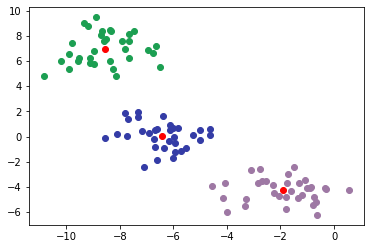

In [4]:
if __name__ == '__main__':
    n = 100
    points = random_points(n)
    k = find_optimal_k(points)
    colors = []
    for i in range(k):
        colors.append(random_color())
    clusters, centroids = k_means(k, points)
    draw(points, centroids, clusters, colors)